In [1]:
#From medium.com/@permoonzz

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from scipy.stats import skew

In [2]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
data_all = pd.concat((data_train, data_test), sort=False).reset_index(drop=True)

In [3]:
# numeric featurfe describe
describe_num = data_all.describe().transpose()
#print(describe_num)    # too long, skipped

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']


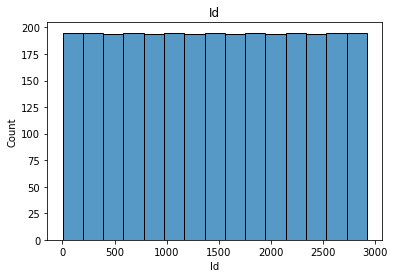

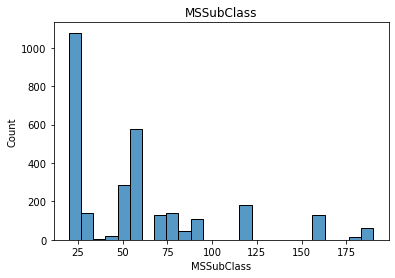

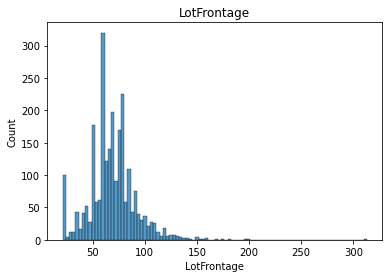

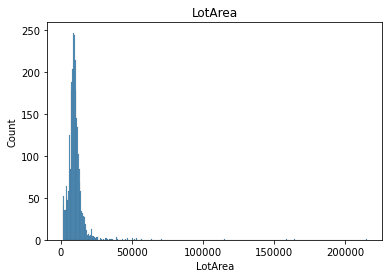

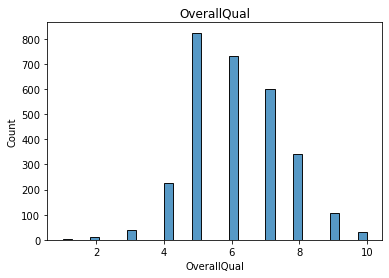

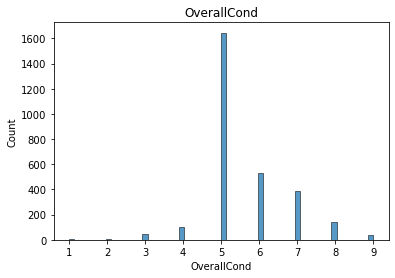

In [4]:
# number features
num_data = data_all.select_dtypes(['int64','float64'])

# many graphs, render them in separate blocks
print(list(num_data.columns[0:6]))
for i in list(num_data.columns[0:6]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']


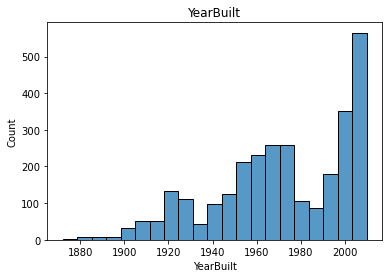

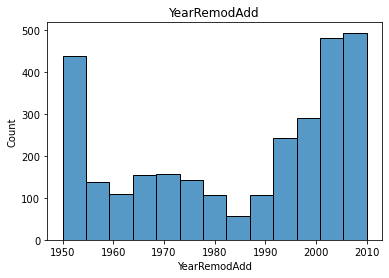

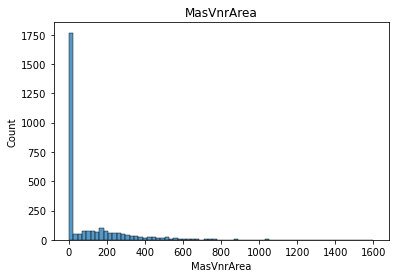

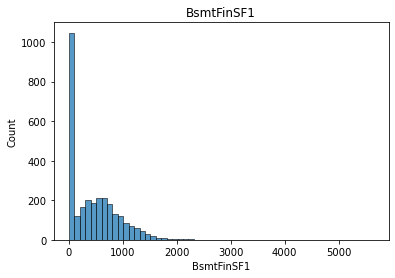

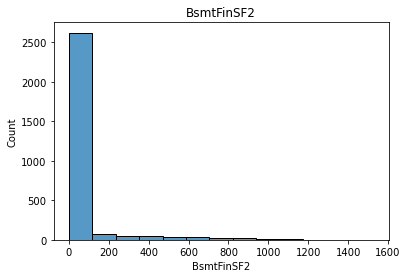

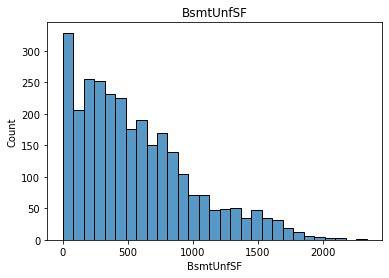

In [5]:
# many graphs, render them in separate blocks
print(list(num_data.columns[6:12]))
for i in list(num_data.columns[6:12]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']


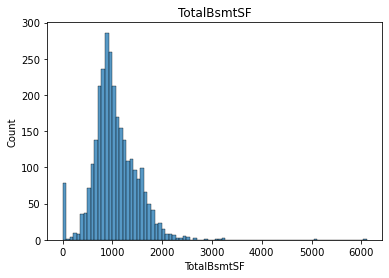

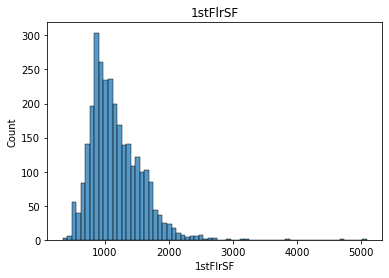

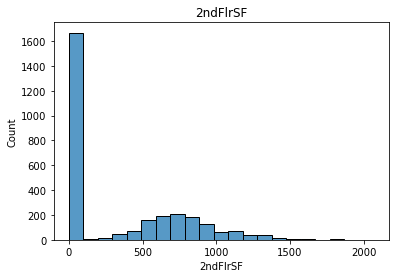

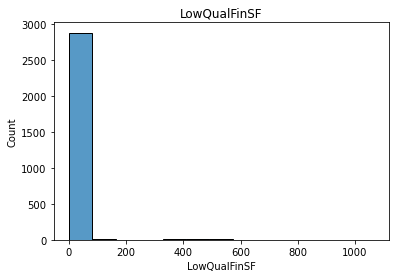

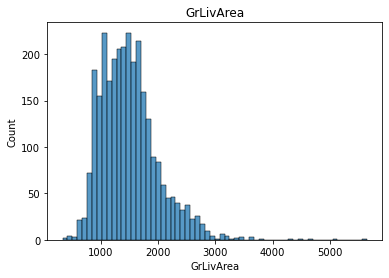

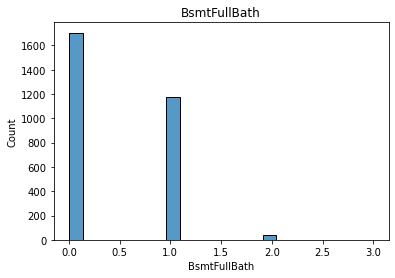

In [6]:
# many graphs, render them in separate blocks
print(list(num_data.columns[12:18]))
for i in list(num_data.columns[12:18]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']


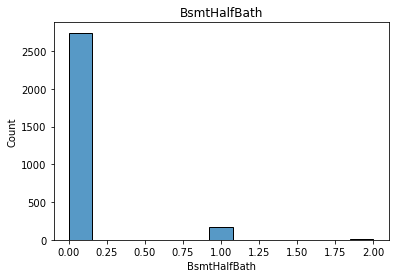

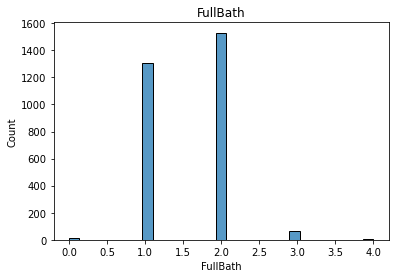

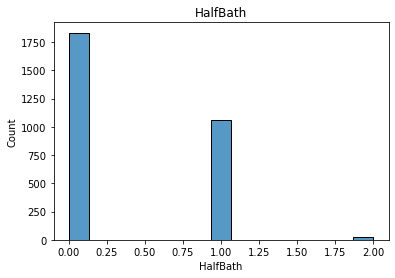

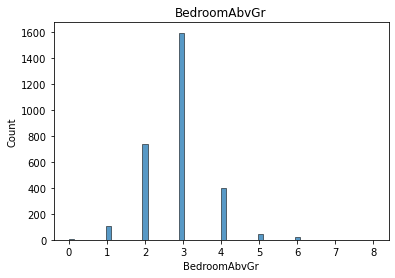

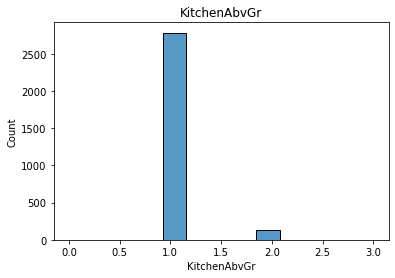

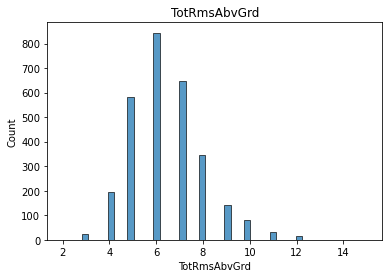

In [7]:
# many graphs, render them in separate blocks
print(list(num_data.columns[18:24]))
for i in list(num_data.columns[18:24]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


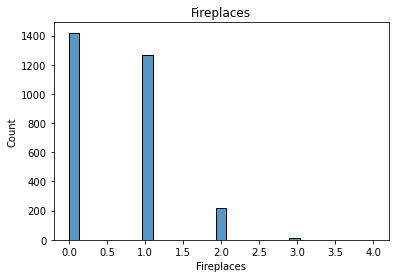

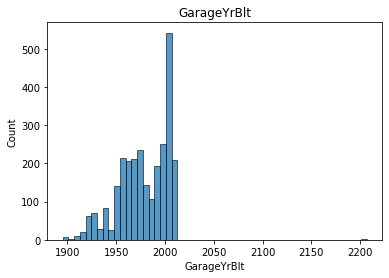

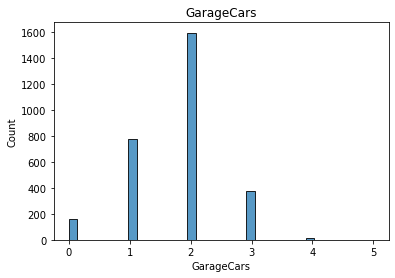

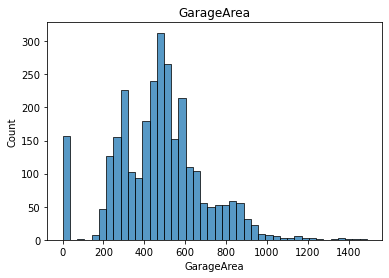

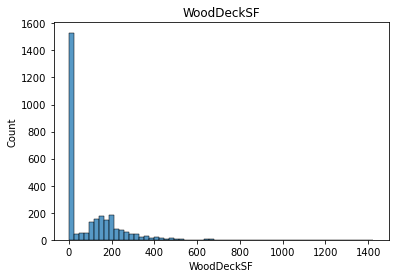

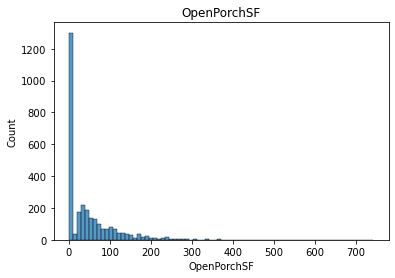

In [8]:
# many graphs, render them in separate blocks
print(list(num_data.columns[24:30]))
for i in list(num_data.columns[24:30]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


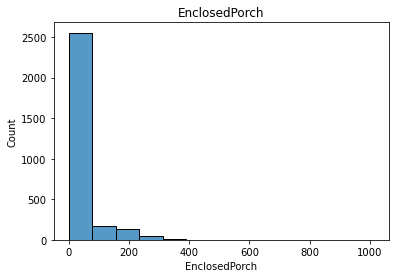

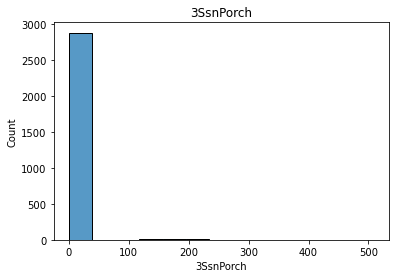

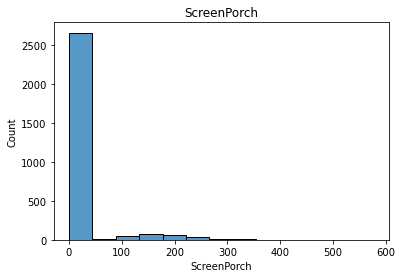

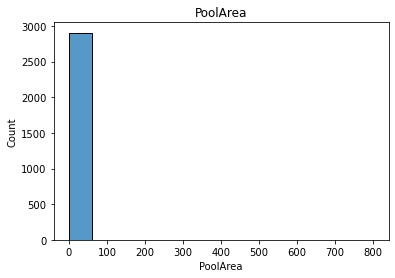

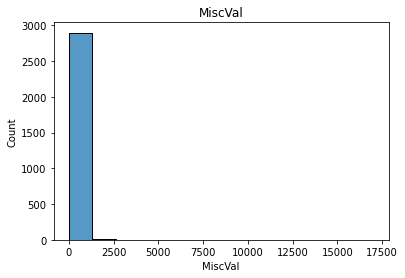

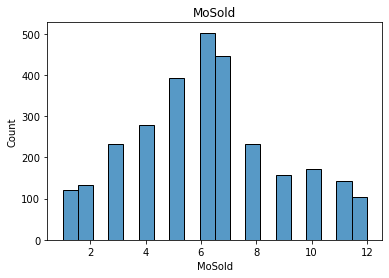

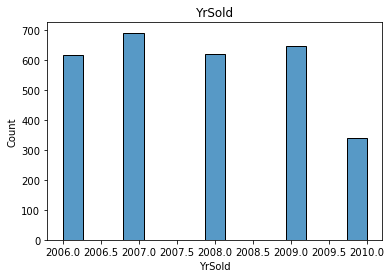

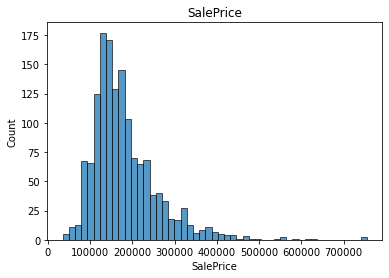

In [9]:
# many graphs, render them in separate blocks
print(list(num_data.columns[30:]))
for i in list(num_data.columns[30:]): 
    sns.histplot(num_data[i].dropna()).set_title(i)
    plt.show()

In [10]:
## Observations:
#Normal: MSSubClass, OverallQual, OverallCond, BsmtUnfSF, GrLivArea, 
#        BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, 
#        TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, MoSold, 

#skewed: LotFrontage, LotArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, TotalBsmtSF, 1sfFlrSF

#Many 0: MasVnrArea, BsmtFinSF1, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, 
#        BsmtHalfBath, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, 

#Special: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

#Igore: Id, SalesPrice
#print(skew(data_all['MSSubClass'].dropna()))
#print(skew(data_all['WoodDeckSF'].dropna()))

1.3754573602849356
1.8424328111184782


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


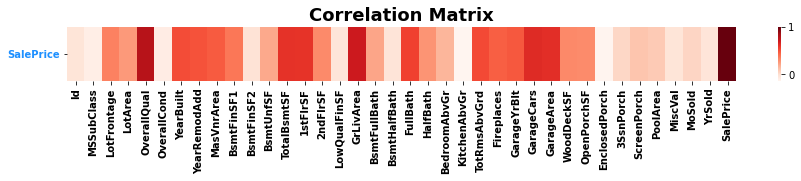

In [11]:
# correlation heatmap
num_train = data_train.select_dtypes(['int64','float64'])
num_corr = num_train.corr().drop('Id')    

fig,ax=plt.subplots(figsize=(15,1))
sns.heatmap(num_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Reds')
plt.title("Correlation Matrix", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

# top 10 
print(num_corr['SalePrice'].sort_values(ascending=False).iloc[1:11])

## OverallQual and GrLivArea are important number features!

MSZoning  types:  6


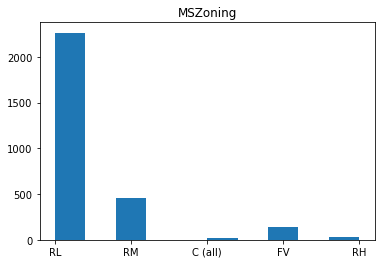

Street  types:  2


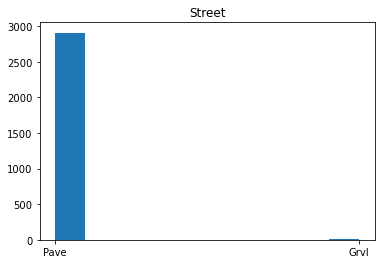

Alley  types:  3


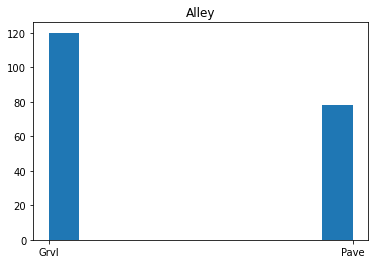

LotShape  types:  4


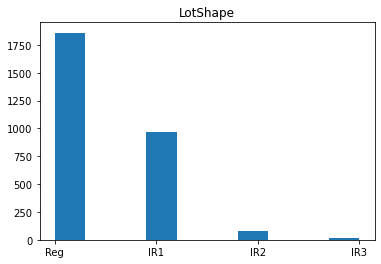

LandContour  types:  4


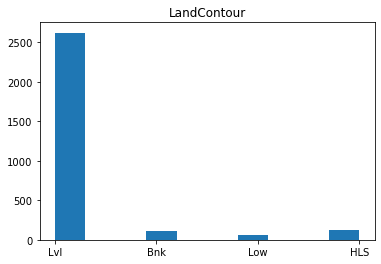

Utilities  types:  3


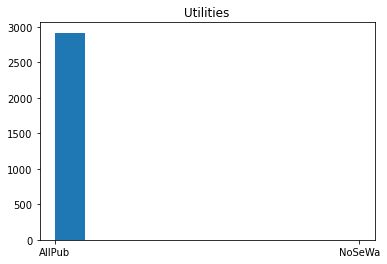

LotConfig  types:  5


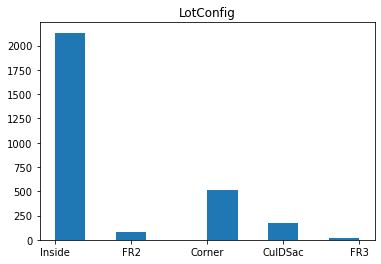

LandSlope  types:  3


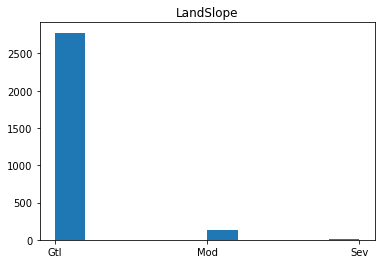

Neighborhood  types:  25


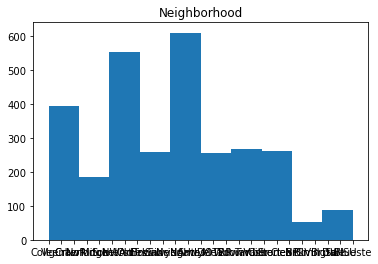

Condition1  types:  9


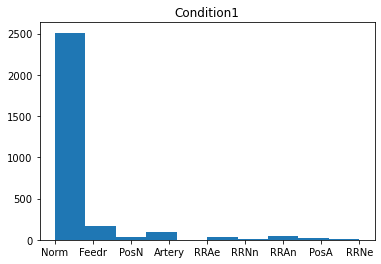

In [12]:
# non-number features
cat_data=data_all.select_dtypes(['object'])

# print(len(cat_data.columns))    #43
# many graphs again
#for i in list(cat_data.columns):
#    fig,ax=plt.subplots(1,1) 
#    ax.hist(cat_data[i].dropna())
#    ax.set_title(i,fontsize=12,color='Black')
#    plt.show()

for i in list(cat_data.columns[:10]):
    print(i, ' types: ', len(cat_data[i].unique()))
    fig,ax=plt.subplots(1,1) 
    #fig, ax=plt.subplots(nrows=1, ncols=2)
    ax.hist(cat_data[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

Condition2  types:  8


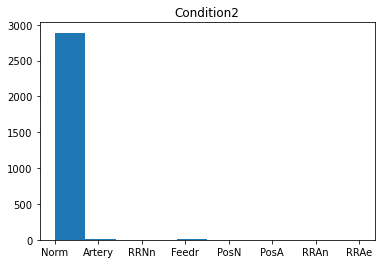

BldgType  types:  5


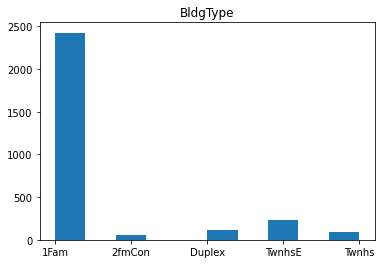

HouseStyle  types:  8


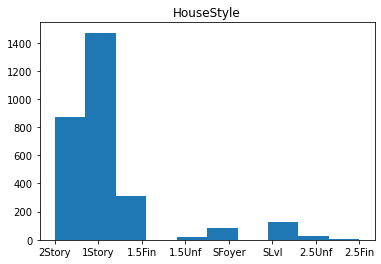

RoofStyle  types:  6


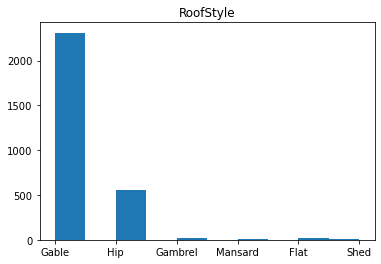

RoofMatl  types:  8


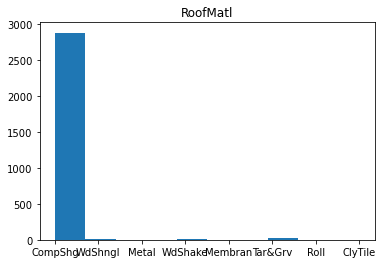

Exterior1st  types:  16


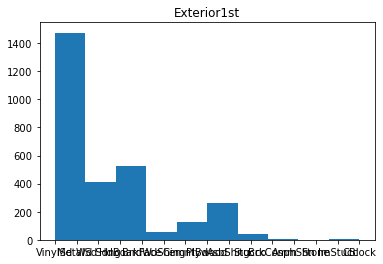

Exterior2nd  types:  17


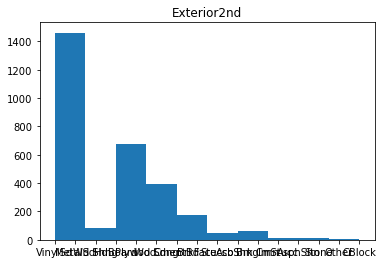

MasVnrType  types:  5


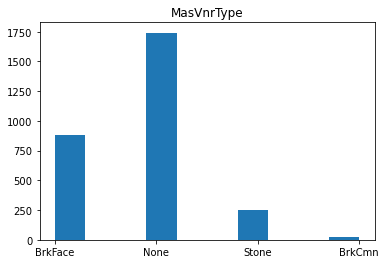

ExterQual  types:  4


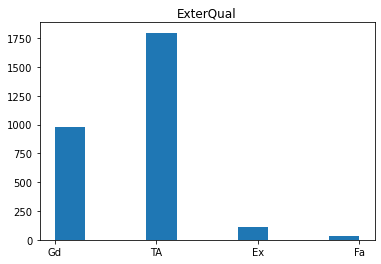

ExterCond  types:  5


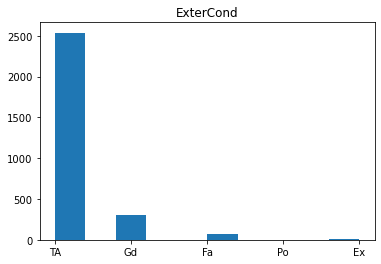

In [13]:
for i in list(cat_data.columns[10:20]):
    print(i, ' types: ', len(cat_data[i].unique()))
    fig,ax=plt.subplots(1,1) 
    #fig, ax=plt.subplots(nrows=1, ncols=2)
    ax.hist(cat_data[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

Foundation  types:  6


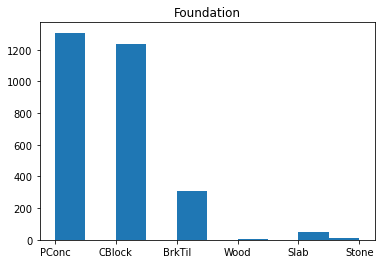

BsmtQual  types:  5


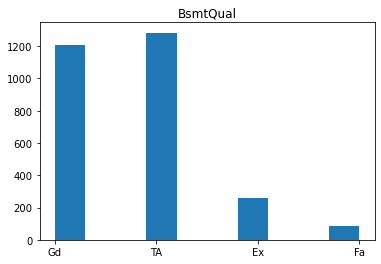

BsmtCond  types:  5


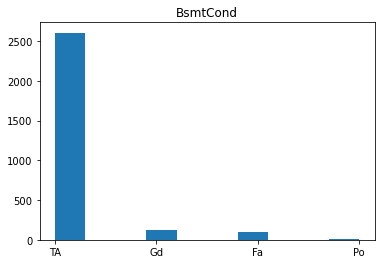

BsmtExposure  types:  5


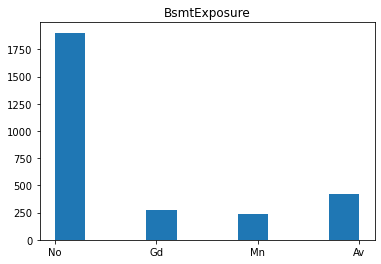

BsmtFinType1  types:  7


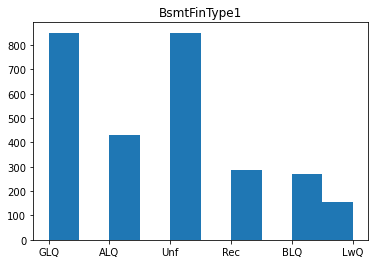

BsmtFinType2  types:  7


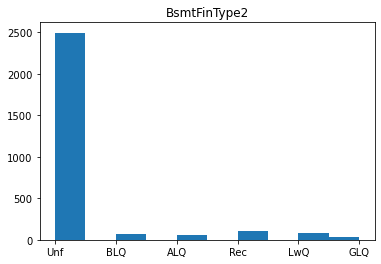

Heating  types:  6


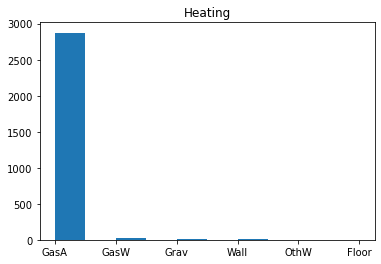

HeatingQC  types:  5


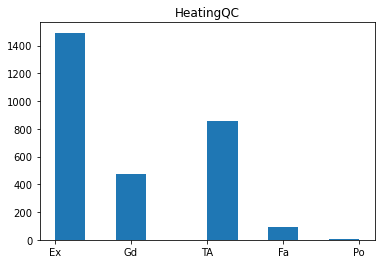

CentralAir  types:  2


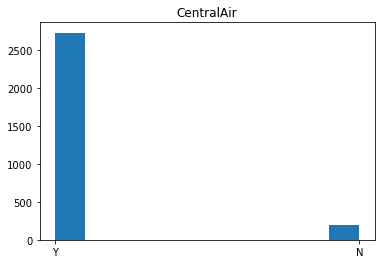

Electrical  types:  6


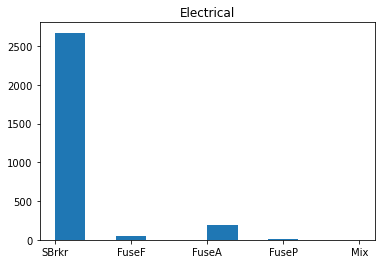

In [14]:
for i in list(cat_data.columns[20:30]):
    print(i, ' types: ', len(cat_data[i].unique()))
    fig,ax=plt.subplots(1,1) 
    #fig, ax=plt.subplots(nrows=1, ncols=2)
    ax.hist(cat_data[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

KitchenQual  types:  5


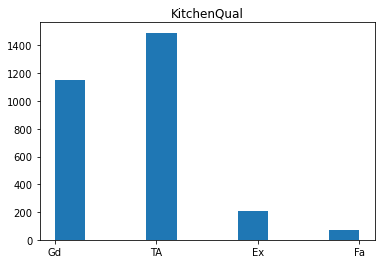

Functional  types:  8


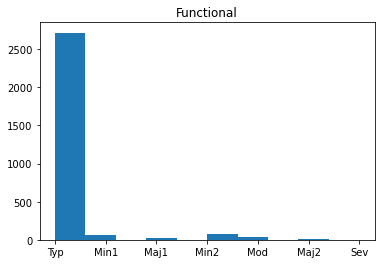

FireplaceQu  types:  6


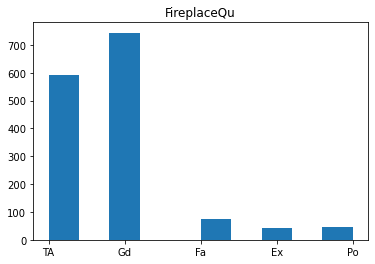

GarageType  types:  7


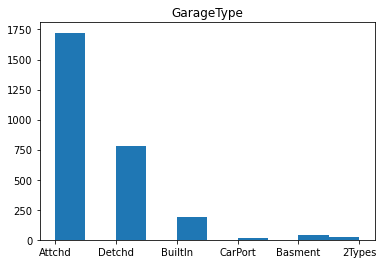

GarageFinish  types:  4


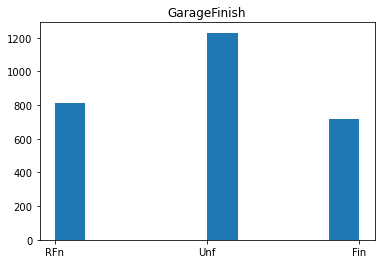

GarageQual  types:  6


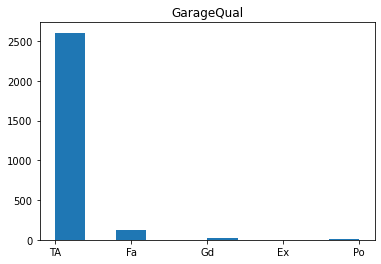

GarageCond  types:  6


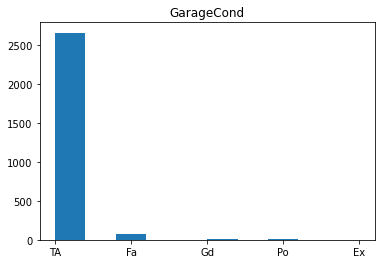

PavedDrive  types:  3


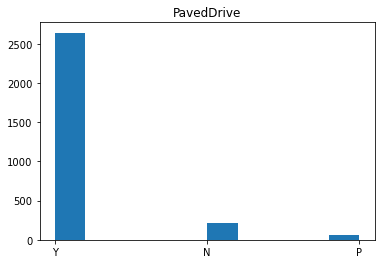

PoolQC  types:  4


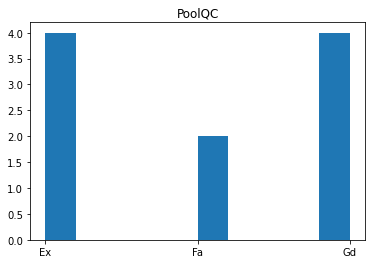

Fence  types:  5


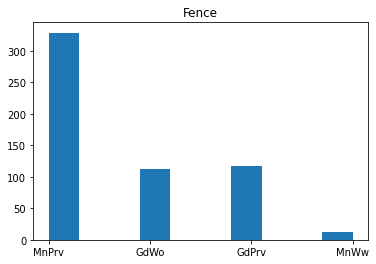

MiscFeature  types:  5


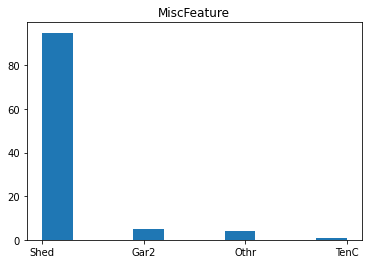

SaleType  types:  10


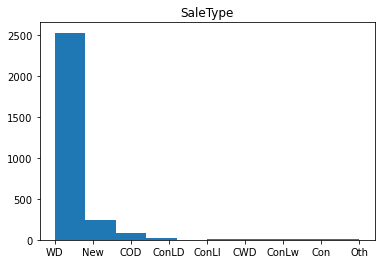

SaleCondition  types:  6


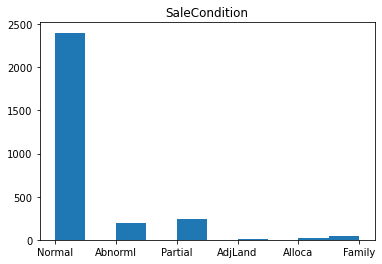

In [15]:
for i in list(cat_data.columns[30:]):
    print(i, ' types: ', len(cat_data[i].unique()))
    fig,ax=plt.subplots(1,1) 
    #fig, ax=plt.subplots(nrows=1, ncols=2)
    ax.hist(cat_data[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

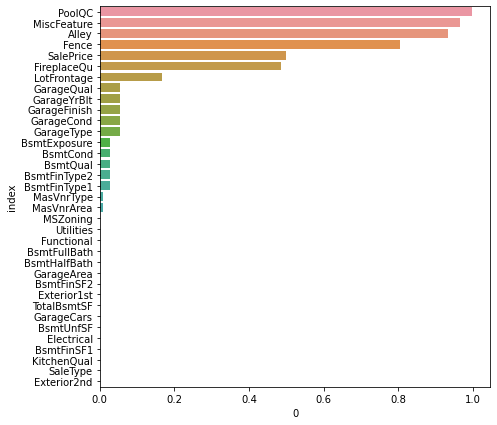

In [16]:
## Missing data
missing_columns=data_all.isnull().mean().sort_values(ascending=False)
missing_columns=missing_columns[missing_columns!=0].to_frame().reset_index()

fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(x=0,y='index',data=missing_columns)

## drop columns PoolQC, FiscFeature, Alley, Fence

In [17]:
## Drop & fill
# drop columns that are extreme (all rows almost have same value) and have too many NA
data_all=data_all.drop(columns=['Heating', 'RoofMatl', 'Condition2', 'Utilities', 'Street', \
                                'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

missing_cat=['FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure', \
             'BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning', \
             'Functional','Exterior1st','KitchenQual','Exterior2nd','SaleType']
missing_num=['LotFrontage','MasVnrArea','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','GarageArea', \
             'BsmtUnfSF','BsmtFinSF2','GarageCars','BsmtFinSF1']

# fill none & 0
for i in missing_cat:
    data_all[i]=data_all[i].fillna('none') 
    
for i in missing_num:
    data_all[i]=data_all[i].fillna(0)

data_all['GarageYrBlt'] = data_all['GarageYrBlt'].fillna(data_all['GarageYrBlt'].median())

In [18]:
## Outliers

data_remove_outlier=data_all[:1460]

## Many graphs, skipped
#for c in num_train:
#    sns.scatterplot(x=c, y="SalePrice", data=data_remove_outlier).set_title(c,fontsize=12,color='Black')
#    plt.show()

In [19]:
outlier_columns=['LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF', \
                 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd', 'MiscVal']

outlier_threshold=[300, 1400, 5000, 6000, 4000, 4500, 8, 14, 8000]

for c,n in zip(outlier_columns,outlier_threshold):
    data_remove_outlier=data_remove_outlier[data_remove_outlier[c]<n]
    
data_all = pd.concat((data_remove_outlier, data_all[1460:]), sort=False).reset_index(drop=True)

In [20]:
## Take log for number columns

for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal']):
    data_all[i]=(np.log1p(data_all[i].dropna()))
    
# check result, skipped
'''
for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal']):
    sns.distplot(data_all[i].dropna(),color='red').set_title(i)
    plt.show()
'''

"\nfor i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',\n               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',\n               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',\n               'LotArea','PoolArea','MiscVal']):\n    sns.distplot(data_all[i].dropna(),color='red').set_title(i)\n    plt.show()\n"

In [21]:
## Special treatment:
## Values of some columns have semantic meanings. Assign them by sequence number (score)

# re-executing the codes will result in error (compare str to int), as values are already replaced by number
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', \
          'GarageQual','GarageCond']:
    data_all[i]=data_all[i].replace(to_replace=['Ex','Gd','TA','Fa','Po', 'none'], 
                                    value=[5, 4, 3, 2, 1, 0], 
                                    inplace=True).astype(int)
    
for i in ['BsmtExposure']:
    data_all[i]=data_all[i].replace(['Gd','Av','Mn','No', 'none'], [4, 3, 2, 1, 0]).astype(int)
    
for i in ['BsmtFinType1','BsmtFinType2']:
    data_all[i]=data_all[i].replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','none'], [6, 5, 4, 3, 2, 1, 0]).astype(int)

AttributeError: 'NoneType' object has no attribute 'astype'

In [24]:
## Special treatment:
# Year

# years: built to sold
data_all['House_year']=data_all['YrSold']-data_all['YearBuilt']
# years: remodel to sold
data_all['Remod_year']=data_all['YrSold']-data_all['YearRemodAdd']
# years: bulit garage to sold
data_all['Garage_built']=data_all['YrSold']-data_all['GarageYrBlt']

In [25]:
## Special treatment:
# by semantic meanings, convert number to string

for i in ['YrSold','MSSubClass','MoSold']:
    data_all[i]=data_all[i].astype(str)

In [26]:
## one hot encoding
data_final=pd.get_dummies(data_all)
data_final=data_final.drop(['Id'],axis=1).reset_index(drop=True)

In [28]:
## split train and validate data
x = data_final[:1453].drop('SalePrice', axis=1)  #na is the number of rows of the original training set
y=np.array(np.log1p(data_remove_outlier['SalePrice']))
Test = data_final[1453:].drop('SalePrice', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=321)

In [29]:
from sklearn.linear_model import RidgeCV
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Ridge = RidgeCV(cv=5, alphas=alpha,normalize=True)
Ridge_fit=Ridge.fit(x_train,y_train)
y_ridge_train=Ridge_fit.predict(x_train)
y_ridge_test=Ridge_fit.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_ridge_train))))
print('RMSE_test_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_ridge_test))))

RMSE_train_Ridge = 0.09203884824026565
RMSE_test_Ridge = 0.11687552399971844


In [1]:
from lightgbm import LGBMRegressor
estimator=LGBMRegressor()